In [124]:
#imports
from bs4 import BeautifulSoup
import requests
import time, os
import random

https://pypi.org/project/geopy/

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "Apartment-Regression")
location = geolocator.geocode("1656 Stillwell Ave, Brooklyn, NY 11223")
print(location.address)
print((location.latitude, location.longitude))
#print(location.raw)

1656, Stillwell Avenue, Gravesend, Brooklyn, Kings County, New York, 11223, United States
(40.60655673312856, -73.98723318726259)


In [13]:
scraping_url = "https://streeteasy.com/for-rent/brooklyn"
test_url = "https://streeteasy.com/building/556-court-street-brooklyn/2"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0"}
response = requests.get(test_url, headers = headers)
response.status_code

403

In [14]:
page = response.text
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <style type="text/css">
   input[type="submit"] {
        margin: 43px 0 74px;
        padding: 10px 16px;
        line-height: 1.33;
        font-size: 14px;
        font-weight: 400;
        text-transform: uppercase;
        color: #FFF;
        background: #555;
        border: solid #555;
        border-width: 0 0 2px 0;
        border-radius: 2px;
        transition: all 200ms;
    }
        table table {
      width: 600px !important;
    }
    table div { /* logo */
      width: 100%;
      float: none;
      text-align: center;
    }
    table div + div { /* main content */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div { /* trace */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div + div { /* footer */
      width: 100%;
      float: none;
      clear: both;
      text-align: left;
    }
    @media (max-width: 630px) {
      table table {
     

In [15]:
#need to use a fake user agent
from fake_useragent import UserAgent

ua = UserAgent()
user_agent = {'User-agent': ua.random}
print(user_agent)

response  = requests.get(test_url, headers = user_agent)
response.status_code

{'User-agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'}


403

In [16]:
page = response.text
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <style type="text/css">
   input[type="submit"] {
        margin: 43px 0 74px;
        padding: 10px 16px;
        line-height: 1.33;
        font-size: 14px;
        font-weight: 400;
        text-transform: uppercase;
        color: #FFF;
        background: #555;
        border: solid #555;
        border-width: 0 0 2px 0;
        border-radius: 2px;
        transition: all 200ms;
    }
        table table {
      width: 600px !important;
    }
    table div { /* logo */
      width: 100%;
      float: none;
      text-align: center;
    }
    table div + div { /* main content */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div { /* trace */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div + div { /* footer */
      width: 100%;
      float: none;
      clear: both;
      text-align: left;
    }
    @media (max-width: 630px) {
      table table {
     

In [27]:
#still won't work. need to use Selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [29]:
driver = webdriver.Chrome(chromedriver)
driver.get(test_url)

In [30]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
print(soup.prettify())

<html lang="en-US" style="overflow-y: auto;" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:v="urn:schemas-microsoft-com:vml">
 <head>
  <style>
   .gm-control-active>img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active>img:nth-child(1){display:block}.gm-control-active:hover>img:nth-child(1),.gm-control-active:active>img:nth-child(1){display:none}.gm-control-active:hover>img:nth-child(2),.gm-control-active:active>img:nth-child(3){display:block}
  </style>
  <link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700|Google+Sans:400,500,700" rel="stylesheet" type="text/css"/>
  <style>
   .gm-ui-hover-effect{opacity:.6}.gm-ui-hover-effect:hover{opacity:1}
  </style>
  <style>
   .gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10px;box-sizing:border-box}
  </style>
  <sty

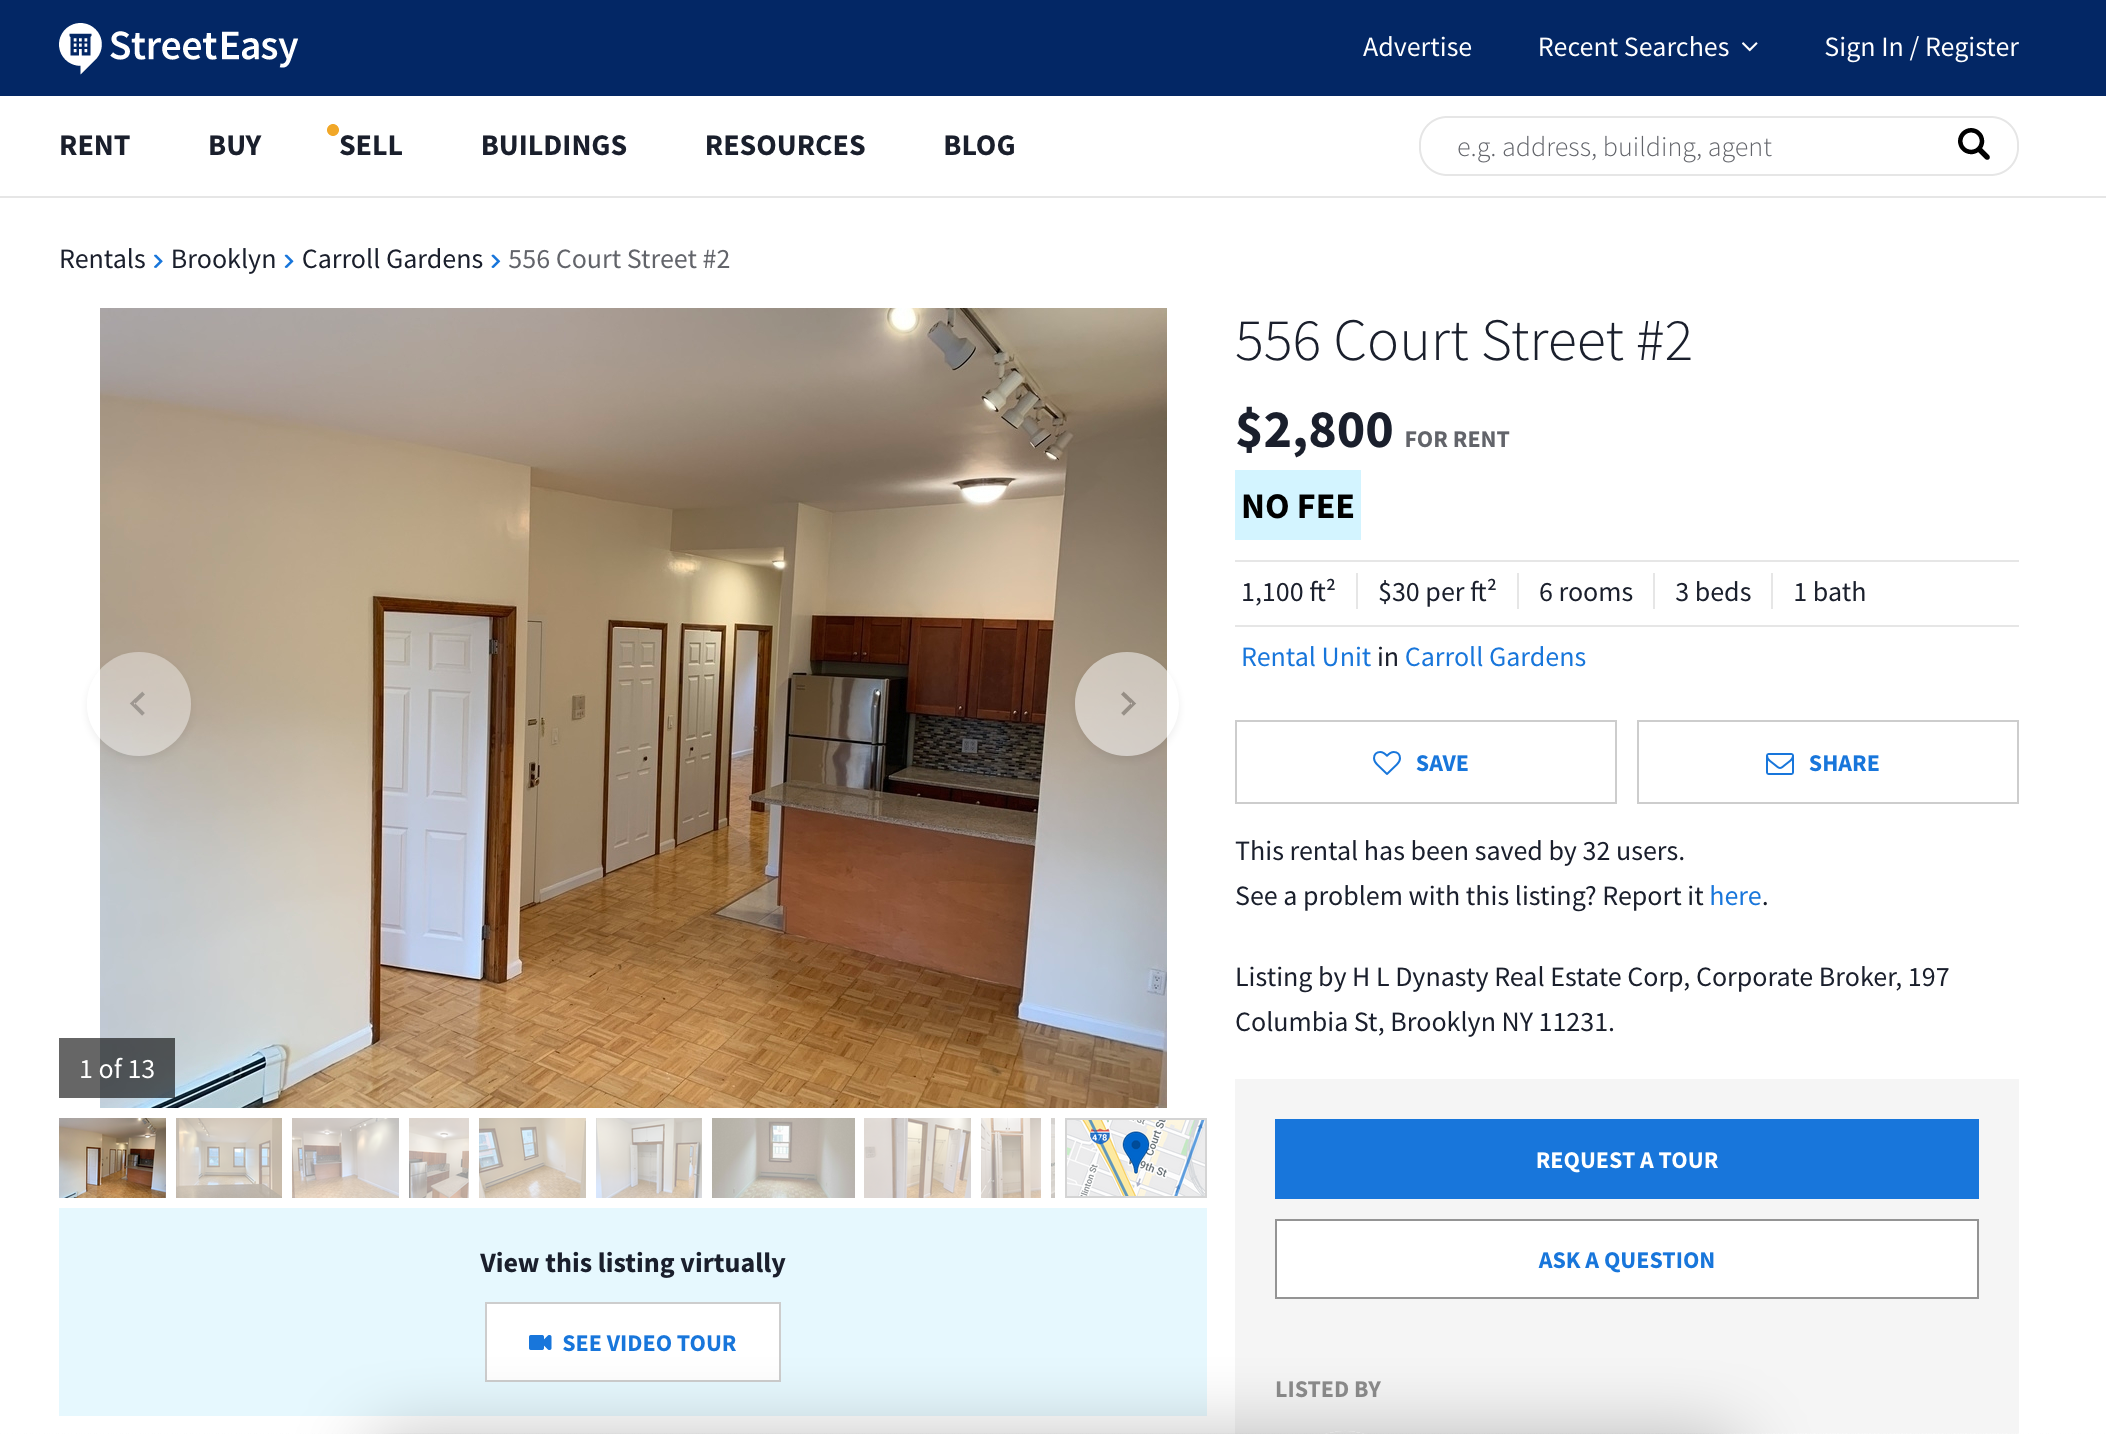

In [33]:
price = soup.find(class_ = "price").text.strip()
print(price)

$2,800
                for rent


In [35]:
price.split()

['$2,800', 'for', 'rent']

In [37]:
price = price.split()[0]
price

'$2,800'

In [39]:
all_details = soup.find_all(class_ = "detail_cell")
all_details

[<span class="detail_cell first_detail_cell">1,100 ft²</span>,
 <span class="detail_cell">$30 per ft²</span>,
 <span class="detail_cell">6 rooms</span>,
 <span class="detail_cell">3 beds</span>,
 <span class="detail_cell last_detail_cell">1 bath</span>]

In [109]:
sq_ft = int(all_details[0].text.split()[0].replace(',', ''))
cost_per_sq_ft = all_details[1].text
num_rooms = int(all_details[2].text.split()[0])
num_beds = int(all_details[3].text.split()[0])
num_baths = int(all_details[4].text.split()[0])
print(sq_ft, cost_per_sq_ft, num_rooms, num_beds, num_baths, sep = ", ")

1100, $30 per ft², 6, 3, 1


In [60]:
address_raw = soup.find(class_ = "backend_data BuildingInfo-item").find_all(class_ = "Text")
address_raw

[<a class="Text" href="https://streeteasy.com/building/556-court-street-brooklyn"> 556 Court Street</a>,
 <span class="Text">
              Brooklyn, NY 11231
           </span>]

In [93]:
address = address_raw[0].text.strip() + ", " + address_raw[1].text.strip()
print(address)

556 Court Street, Brooklyn, NY 11231


In [94]:
zip_code = int(address.split()[-1])
zip_code

11231

In [95]:
street_address = address.split(",")[0]
street_address

'556 Court Street'

In [77]:
unit = soup.find(class_ = "building-title").a.text.split()[-1]
unit

'#2'

In [71]:
import pandas as pd
import pickle

In [243]:
df_headers = ["address", "zip code", "unit", "rent", "size (sq. ft)", "rooms", "beds", "baths", "has a studio", "link"]

apt_data = []
index = 0
apt_dict = dict(zip(df_headers, [street_address, zip_code, unit, price, sq_ft, num_rooms, num_beds, num_baths, link]))
apt_data.append(apt_dict)
apt_data

[{'address': '1296 Pacific Street',
  'zip code': 11216,
  'unit': '#608',
  'rent': '$1,475',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 0,
  'baths': 1.0,
  'has a studio': 'https://streeteasy.com/building/61-south-elliott-place-brooklyn/c'}]

In [111]:
test_frame = pd.DataFrame.from_dict(apt_data)
test_frame

,address,zip code,unit,rent,size (sq. ft),rooms,beds,baths
0,556 Court Street,11231,#2,"$2,800",1100,6,3,1


In [113]:
#want to scrape every apartment listing on a page (other than the first 2 "featured" listings, which could cause duplicates)
page_num = 1
scraping_url = f"https://streeteasy.com/for-rent/brooklyn?page={page_num}"
driver.get(scraping_url)

In [120]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
all_urls = soup.find_all('a', class_ = "listingCard-globalLink jsGlobalListingCardLink", attrs = "href")
print(all_urls)

[<a aria-labelledby="info-3509564" class="listingCard-globalLink jsGlobalListingCardLink" data-category="rentals_search" data-listing-id="3509564" data-slot="0" href="https://streeteasy.com/building/1809-albemarle-road-brooklyn/c49"></a>, <a aria-labelledby="info-3509561" class="listingCard-globalLink jsGlobalListingCardLink" data-category="rentals_search" data-listing-id="3509561" data-slot="0" href="https://streeteasy.com/building/287-lefferts-avenue-brooklyn/1"></a>, <a aria-labelledby="info-3509560" class="listingCard-globalLink jsGlobalListingCardLink" data-category="rentals_search" data-listing-id="3509560" data-slot="0" href="https://streeteasy.com/rental/3509560"></a>, <a aria-labelledby="info-3509559" class="listingCard-globalLink jsGlobalListingCardLink" data-category="rentals_search" data-listing-id="3509559" data-slot="0" href="https://streeteasy.com/building/748-st-marks-avenue-brooklyn/6c"></a>, <a aria-labelledby="info-3509554" class="listingCard-globalLink jsGlobalListi

In [121]:
listings = []
for u in all_urls:
    link = u.get("href")
    listings.append(link)
print(listings)

['https://streeteasy.com/building/1809-albemarle-road-brooklyn/c49', 'https://streeteasy.com/building/287-lefferts-avenue-brooklyn/1', 'https://streeteasy.com/rental/3509560', 'https://streeteasy.com/building/748-st-marks-avenue-brooklyn/6c', 'https://streeteasy.com/building/the-landing-at-brooklyn-bridge-park/5f', 'https://streeteasy.com/building/580-decatur-street-brooklyn/garden', 'https://streeteasy.com/building/178-carlton-avenue-brooklyn/2', 'https://streeteasy.com/building/1340-hancock-street-brooklyn/3r', 'https://streeteasy.com/building/102-quincy-street-brooklyn/4r', 'https://streeteasy.com/building/2837-church-avenue-brooklyn/2r', 'https://streeteasy.com/building/1296-pacific-street-brooklyn/608']


In [122]:
len(listings)

11

In [240]:
def parse_details(details_list, sq_ft = -1, cost_per_sq_ft = -1, num_rooms = -1, num_beds = -1, num_baths = -1, has_studio = 0):
    for d in details_list:
        print("parsing: " + d.text)
        if d.text == "studio":
            num_beds = 0
            has_studio = 1
        else:
            keyword = (d.text.split()[1])
            print("keyword: " + keyword)
            if keyword == "ft²":
                sq_ft = int(d.text.split()[0].replace(',', ''))

            elif keyword == "per":
                cost_per_sq_ft = d.text

            elif keyword in ["room", "rooms"]:
                num_rooms = float(d.text.split()[0])
                print(str(num_rooms) + " rooms")

            elif keyword in ["bed", "beds"]:
                num_beds = float(d.text.split()[0])
                
            elif keyword in ["bath", "baths"]:
                num_baths = float(d.text.split()[0]) #sometimes there are half-bathrooms
    return([sq_ft, cost_per_sq_ft, num_rooms, num_beds, num_baths, has_studio])

In [241]:
parse_details(all_details)

parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: studio
parsing: 1 bath
keyword: bath


[-1, -1, 3.0, 0, 1.0, 1]

In [186]:
all_details

[<span class="detail_cell first_detail_cell">4 rooms</span>,
 <span class="detail_cell">2 beds</span>,
 <span class="detail_cell last_detail_cell">1 bath</span>]

In [242]:
apt_data = []

#driver = webdriver.Chrome(chromedriver)

def scrape_page(listings):
    for l in listings:
        driver.get(l)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        address_raw = soup.find(class_ = "backend_data BuildingInfo-item").find_all(class_ = "Text")
        address = address_raw[0].text.strip() + ", " + address_raw[1].text.strip()
        street_address = address.split(",")[0]
        unit = soup.find(class_ = "building-title").a.text.split()[-1]
        zip_code = int(address.split()[-1])
        price = soup.find(class_ = "price").text.split()[0]
        all_details = soup.find_all(class_ = "detail_cell")
        [sq_ft, cost_per_sq_ft, num_rooms, num_beds, num_baths, has_studio] = parse_details(all_details)
        apt_dict = dict(zip(df_headers, [street_address, zip_code, unit, price, sq_ft, num_rooms, num_beds, num_baths, has_studio, l]))
        apt_data.append(apt_dict)
        #sq_ft = num_rooms = num_beds = num_baths = -1
        time.sleep(random.randint(1, 4)) # waiting 5 seconds every time triggered a captcha quickly, but this doesn't

In [223]:
apt_data

[{'address': '1296 Pacific Street',
  'zip code': 11216,
  'unit': '#608',
  'rent': '$1,475',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 0,
  'baths': 1.0},
 {'address': '227 Kingston Avenue',
  'zip code': 11213,
  'unit': '#2FF',
  'rent': '$1,895',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 1,
  'baths': 1.0},
 {'address': '227 Kingston Avenue',
  'zip code': 11213,
  'unit': '#2FF',
  'rent': '$1,895',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 1,
  'baths': 1.0},
 {'address': '272 Albany Avenue',
  'zip code': 11213,
  'unit': '#F3',
  'rent': '$1,650',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 1,
  'baths': 1.0},
 {'address': '218 Hawthorne Street',
  'zip code': 11225,
  'unit': '#2A',
  'rent': '$1,800',
  'size (sq. ft)': -1,
  'rooms': 3,
  'beds': 1,
  'baths': 1.0},
 {'address': '31 Brooklyn Avenue',
  'zip code': 11216,
  'unit': '#2H',
  'rent': '$2,550',
  'size (sq. ft)': -1,
  'rooms': 5,
  'beds': 2,
  'baths': 1.0},
 {'address': '115 South 2nd Stree

In [194]:
test_frame = pd.DataFrame.from_dict(apt_data)
test_frame

,address,zip code,unit,rent,size (sq. ft),rooms,beds,baths
0,1809 Albemarle Road,11226,#C49,"$2,150",-1,4,2,1.0
1,287 Lefferts Avenue,11225,#1,"$4,000",1800,5,2,2.0
2,285 23rd Street,11215,Street,"$1,900",-1,4,2,1.0
3,748 Saint Mark's Avenue,11216,#6C,"$1,695",-1,4,1,1.0
4,The Landing At Brooklyn Bridge Park 15 Bridge ...,11201,#5F,"$2,307",-1,1,0,1.0
5,580 Decatur Street,11233,#GARDEN,"$2,950",-1,5,1,1.0
6,178 Carlton Avenue,11205,#2,"$2,500",1200,3,1,1.0
7,1340 Hancock Street,11237,#3R,"$2,750",-1,5,3,1.0
8,102 Quincy Street,11238,#4R,"$2,900",-1,4,2,1.5
9,2837 Church Avenue,11226,#2R,"$2,300",-1,3,1,1.0


From this limited sample, it appears that most listings don't include floor size, so it likely won'e be used in the regression.

Regardless, every time I finish scraping a page of listings, I'll pickle the dataframe (in case there's a runtime error).

In [195]:
test_frame.to_pickle(f"data/apartement_data_{page_num}.pickle")

In [196]:
page_num = 1
pickle_frame = pd.read_pickle(f"data/apartement_data_{page_num}.pickle")
pickle_frame

,address,zip code,unit,rent,size (sq. ft),rooms,beds,baths
0,1809 Albemarle Road,11226,#C49,"$2,150",-1,4,2,1.0
1,287 Lefferts Avenue,11225,#1,"$4,000",1800,5,2,2.0
2,285 23rd Street,11215,Street,"$1,900",-1,4,2,1.0
3,748 Saint Mark's Avenue,11216,#6C,"$1,695",-1,4,1,1.0
4,The Landing At Brooklyn Bridge Park 15 Bridge ...,11201,#5F,"$2,307",-1,1,0,1.0
5,580 Decatur Street,11233,#GARDEN,"$2,950",-1,5,1,1.0
6,178 Carlton Avenue,11205,#2,"$2,500",1200,3,1,1.0
7,1340 Hancock Street,11237,#3R,"$2,750",-1,5,3,1.0
8,102 Quincy Street,11238,#4R,"$2,900",-1,4,2,1.5
9,2837 Church Avenue,11226,#2R,"$2,300",-1,3,1,1.0


In [201]:
# Also want to find number of days on market
all_vitals = soup.find_all(class_ = "Vitals-data")
#print(all_vitals)
all_vitals[0].text.strip()

'Available Now'

In [202]:
def parse_vitals(vitals_list, avail_date, list_date, price_change):
    v = vitals_list[0].text.strip()
    if v == "Available Now": avail_date

In [208]:
listings = []

driver = webdriver.Chrome(chromedriver)

for page_num in range(1, 11):
    scraping_url = f"https://streeteasy.com/for-rent/brooklyn?page={page_num}"
    driver.get(scraping_url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    all_urls = soup.find_all('a', class_ = "listingCard-globalLink jsGlobalListingCardLink", attrs = "href")
    for u in all_urls:
        link = u.get("href")
        listings.append(link)
    time.sleep(random.randint(5, 10))
    
print(listings)

['https://streeteasy.com/building/227-kingston-avenue-brooklyn/2ff', 'https://streeteasy.com/building/272-albany-avenue-brooklyn/f3', 'https://streeteasy.com/building/218-hawthorne-street-brooklyn/2a', 'https://streeteasy.com/building/31-brooklyn-avenue-brooklyn/2h', 'https://streeteasy.com/building/115-south-2-street-brooklyn/2aa1', 'https://streeteasy.com/building/533-washington-avenue-brooklyn/3b', 'https://streeteasy.com/building/1710-quentin-road-brooklyn/405f', 'https://streeteasy.com/building/148-hancock-street-brooklyn/4b', 'https://streeteasy.com/building/250-lenox-road-brooklyn/5b', 'https://streeteasy.com/building/106-ellery-street-brooklyn/1a', 'https://streeteasy.com/building/211-boerum-street-brooklyn/2', 'https://streeteasy.com/building/211-boerum-street-brooklyn/4', 'https://streeteasy.com/building/106-central-avenue-brooklyn/3c1', 'https://streeteasy.com/building/360-central-avenue-brooklyn/2l', 'https://streeteasy.com/building/161-avenue-p-brooklyn/4', 'https://street

In [244]:
driver = webdriver.Chrome(chromedriver)
scrape_page(listings)

parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: 1 bed
keyword: bed
parsing: 1 bath
keyword: bath
parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: 1 bed
keyword: bed
parsing: 1 bath
keyword: bath
parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: 1 bed
keyword: bed
parsing: 1 bath
keyword: bath
parsing: 5 rooms
keyword: rooms
5.0 rooms
parsing: 2 beds
keyword: beds
parsing: 1 bath
keyword: bath
parsing: 4 rooms
keyword: rooms
4.0 rooms
parsing: 3 beds
keyword: beds
parsing: 1 bath
keyword: bath
parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: 1 bed
keyword: bed
parsing: 1 bath
keyword: bath
parsing: 1,050 ft²
keyword: ft²
parsing: $27 per ft²
keyword: per
parsing: 17 rooms
keyword: rooms
17.0 rooms
parsing: 3 beds
keyword: beds
parsing: 2 baths
keyword: baths
parsing: 3 rooms
keyword: rooms
3.0 rooms
parsing: 1 bed
keyword: bed
parsing: 1 bath
keyword: bath
parsing: 6 rooms
keyword: rooms
6.0 rooms
parsing: 2 beds
keyword: beds
parsing: 2 baths
keyword: baths
parsing: 5 rooms
key

ValueError: could not convert string to float: '1+'

In [231]:
print(apt_data)

[{'address': '227 Kingston Avenue', 'zip code': 11213, 'unit': '#2FF', 'rent': '$1,895', 'size (sq. ft)': -1, 'rooms': 3, 'beds': 1, 'baths': 1.0, 'link': 'https://streeteasy.com/building/227-kingston-avenue-brooklyn/2ff'}, {'address': '272 Albany Avenue', 'zip code': 11213, 'unit': '#F3', 'rent': '$1,650', 'size (sq. ft)': -1, 'rooms': 3, 'beds': 1, 'baths': 1.0, 'link': 'https://streeteasy.com/building/272-albany-avenue-brooklyn/f3'}, {'address': '218 Hawthorne Street', 'zip code': 11225, 'unit': '#2A', 'rent': '$1,800', 'size (sq. ft)': -1, 'rooms': 3, 'beds': 1, 'baths': 1.0, 'link': 'https://streeteasy.com/building/218-hawthorne-street-brooklyn/2a'}, {'address': '31 Brooklyn Avenue', 'zip code': 11216, 'unit': '#2H', 'rent': '$2,550', 'size (sq. ft)': -1, 'rooms': 5, 'beds': 2, 'baths': 1.0, 'link': 'https://streeteasy.com/building/31-brooklyn-avenue-brooklyn/2h'}, {'address': '115 South 2nd Street', 'zip code': 11249, 'unit': '#2AA1', 'rent': '$3,800', 'size (sq. ft)': -1, 'rooms

In [245]:
new_test_frame = pd.DataFrame.from_dict(apt_data)
new_test_frame

,address,zip code,unit,rent,size (sq. ft),rooms,beds,baths,has a studio,link
0,1296 Pacific Street,11216,#608,"$1,475",-1,3.0,0.0,1.0,https://streeteasy.com/building/61-south-ellio...,NaN
1,227 Kingston Avenue,11213,#2FF,"$1,895",-1,3.0,1.0,1.0,0,https://streeteasy.com/building/227-kingston-a...
2,272 Albany Avenue,11213,#F3,"$1,650",-1,3.0,1.0,1.0,0,https://streeteasy.com/building/272-albany-ave...
3,218 Hawthorne Street,11225,#2A,"$1,800",-1,3.0,1.0,1.0,0,https://streeteasy.com/building/218-hawthorne-...
4,31 Brooklyn Avenue,11216,#2H,"$2,550",-1,5.0,2.0,1.0,0,https://streeteasy.com/building/31-brooklyn-av...
5,115 South 2nd Street,11249,#2AA1,"$3,800",-1,4.0,3.0,1.0,0,https://streeteasy.com/building/115-south-2-st...
6,533 Washington Avenue,11238,#3B,"$1,900",-1,3.0,1.0,1.0,0,https://streeteasy.com/building/533-washington...
7,1710 Quentin Road,11229,#405F,"$2,399",1050,17.0,3.0,2.0,0,https://streeteasy.com/building/1710-quentin-r...
8,148 Hancock Street,11216,#4B,"$1,820",-1,3.0,1.0,1.0,0,https://streeteasy.com/building/148-hancock-st...
9,250 Lenox Road,11226,#5B,"$2,500",-1,6.0,2.0,2.0,0,https://streeteasy.com/building/250-lenox-road...


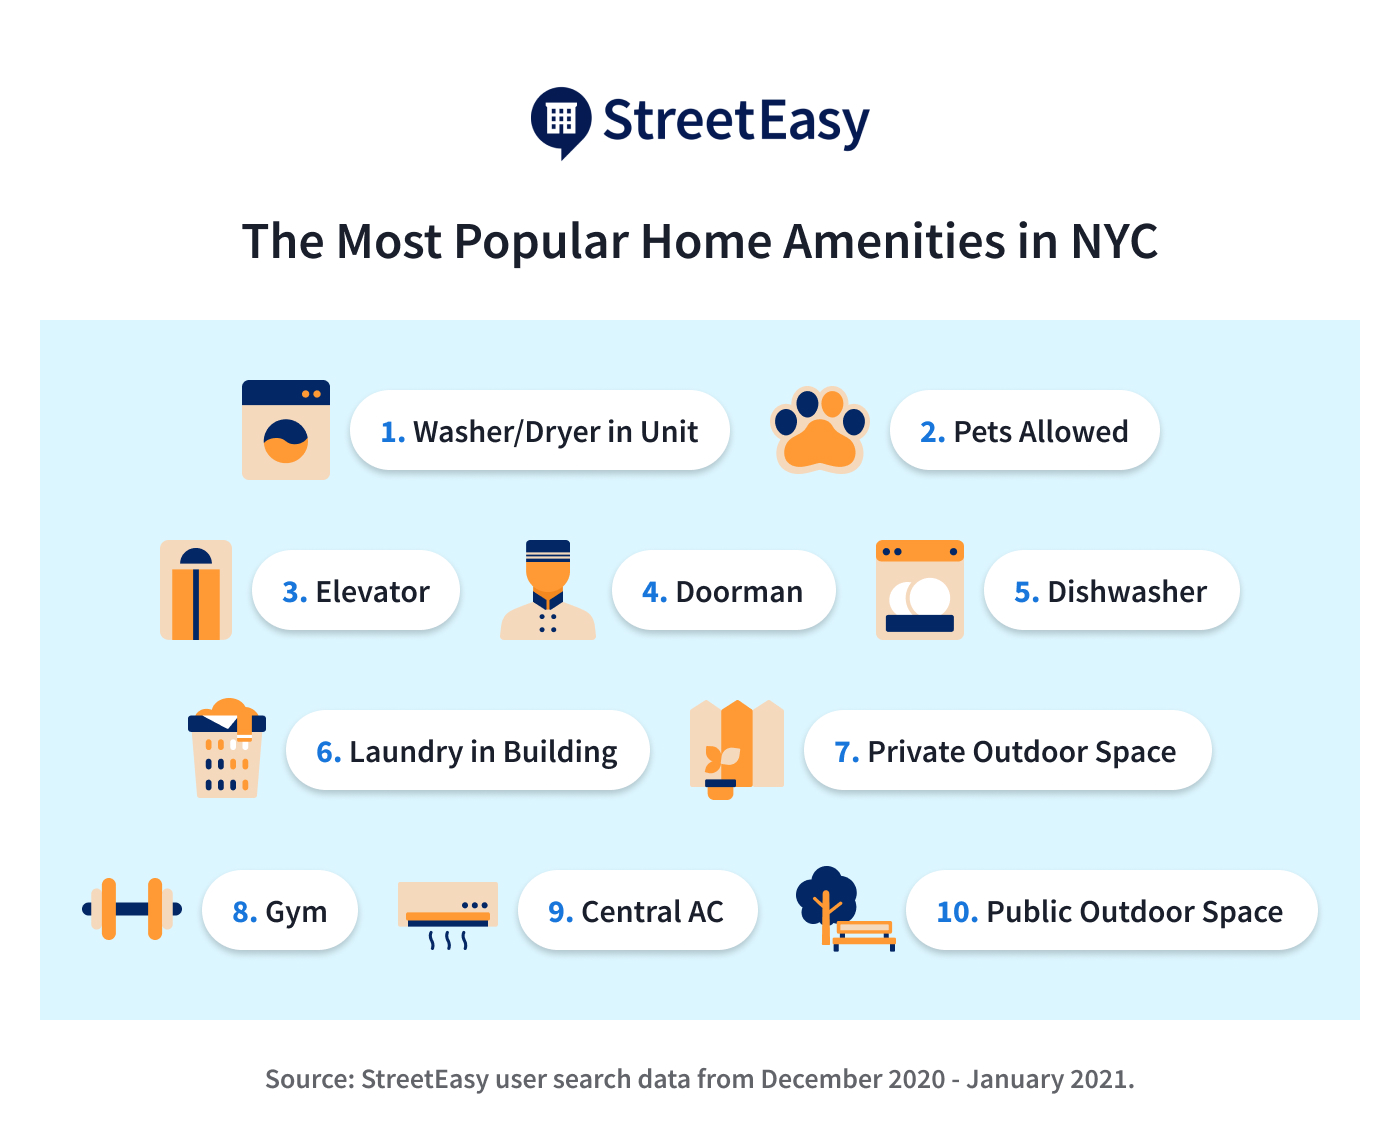

source: https://streeteasy.com/blog/apartment-amenities-new-yorkers-want-most/



In [251]:
driver = webdriver.Chrome(chromedriver)
driver.get("https://streeteasy.com/building/state-renaissance-court/406")
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [275]:
import re

In [276]:
#a_list = soup.find_all("li", attrs = {"class": "AmenitiesBlock-item"})
a_list = soup.find_all("li", attrs = {"class": re.compile("^AmenitiesBlock\-.*[iI]tem$")})
a_list

[<li class="AmenitiesBlock-highlightsItem">
 <div class="AmenitiesBlock-highlightsIconBox">
 <span class="AmenitiesBlock-highlightsIcon AmenitiesBlock-highlightsIcon--doorman"></span>
 </div>
 <div class="AmenitiesBlock-highlightsLabel">
 <div class="Text">
                   Doorman
                 </div>
 </div>
 </li>,
 <li class="AmenitiesBlock-highlightsItem">
 <div class="AmenitiesBlock-highlightsIconBox">
 <span class="AmenitiesBlock-highlightsIcon AmenitiesBlock-highlightsIcon--elevator"></span>
 </div>
 <div class="AmenitiesBlock-highlightsLabel">
 <div class="Text">
                   Elevator
                 </div>
 </div>
 </li>,
 <li class="AmenitiesBlock-highlightsItem">
 <div class="AmenitiesBlock-highlightsIconBox">
 <span class="AmenitiesBlock-highlightsIcon AmenitiesBlock-highlightsIcon--pets"></span>
 </div>
 <div class="AmenitiesBlock-highlightsLabel">
 <div class="Text">
                   Pets Allowed
                 </div>
 </div>
 </li>,
 <li class="Amenities

In [289]:
amenities = []
for a in a_list:
    amenities.append(a.text.strip())
amenities = list(filter(None, amenities))
amenities

['Doorman',
 'Elevator',
 'Pets Allowed',
 'Bike Room',
 'Garage Parking',
 'Gym',
 'Laundry in Building',
 'Live-in Super',
 'Locker/Cage',
 'Smoke-free',
 'Wheelchair Access',
 'City View',
 'Dishwasher',
 'Hardwood Floors',
 'Courtyard',
 'Garden']

32